<h2>Data Understanding & Preprocessing

In [17]:
import pandas as pd

# Load the dataset
file_path = "/content/customer_booking.csv"
df = pd.read_csv(file_path, encoding="ISO-8859-1")

# Display the first few rows
df_head = df.head()

# Display dataset info
df_info = df.info()

print(df_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [18]:
print(df_head)

   num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0            7        Sat  AKLDEL    New Zealand                    1   
1            3        Sat  AKLDEL    New Zealand                    0   
2           17        Wed  AKLDEL          India                    1   
3            4        Sat  AKLDEL    New Zealand                    0   
4           15        Wed  AKLDEL          India                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                     0        

In [19]:
# Checking for missing values and unique values per column
missing_values = df.isnull().sum()
unique_values = df.nunique()

print(missing_values)


num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64


In [20]:
print(unique_values)

num_passengers             9
sales_channel              2
trip_type                  3
purchase_lead            470
length_of_stay           335
flight_hour               24
flight_day                 7
route                    799
booking_origin           104
wants_extra_baggage        2
wants_preferred_seat       2
wants_in_flight_meals      2
flight_duration           21
booking_complete           2
dtype: int64


In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load dataset
file_path = "/content/customer_booking.csv"
df = pd.read_csv(file_path, encoding="ISO-8859-1")

# Apply label encoding to binary categorical columns
binary_cols = ["wants_extra_baggage", "wants_preferred_seat", "wants_in_flight_meals", "booking_complete"]
for col in binary_cols:
    df[col] = df[col].astype(int)

# Apply one-hot encoding to multi-category categorical variables
categorical_cols = ["sales_channel", "trip_type", "flight_day", "booking_origin"]
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the first few rows after encoding
print(df_encoded.head())

   num_passengers  purchase_lead  length_of_stay  flight_hour   route  \
0               2            262              19            7  AKLDEL   
1               1            112              20            3  AKLDEL   
2               2            243              22           17  AKLDEL   
3               1             96              31            4  AKLDEL   
4               2             68              22           15  AKLDEL   

   wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
0                    1                     0                      0   
1                    0                     0                      0   
2                    1                     1                      0   
3                    0                     0                      1   
4                    1                     0                      1   

   flight_duration  booking_complete  ...  booking_origin_Timor-Leste  \
0             5.52                 0  ...                    

In [22]:
# Try loading with ISO-8859-1 encoding
df = pd.read_csv(file_path, encoding="ISO-8859-1")

# Display the first few rows
df.head()


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


<h2>Feature Engineering </h2>
✅ One-Hot Encoding:

sales_channel
trip_type
flight_day

✅ Label Encoding:

route
booking_origin

In [23]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Apply One-Hot Encoding
df = pd.get_dummies(df, columns=["sales_channel", "trip_type", "flight_day"], drop_first=True)

# Apply Label Encoding
label_encoders = {}
for col in ["route", "booking_origin"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store the encoder for inverse transformation if needed later

# Display the updated dataframe structure
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed
0,2,262,19,7,0,61,1,0,0,5.52,0,False,False,True,False,True,False,False,False,False
1,1,112,20,3,0,61,0,0,0,5.52,0,False,False,True,False,True,False,False,False,False
2,2,243,22,17,0,36,1,1,0,5.52,0,False,False,True,False,False,False,False,False,True
3,1,96,31,4,0,61,0,0,1,5.52,0,False,False,True,False,True,False,False,False,False
4,2,68,22,15,0,36,1,0,1,5.52,0,False,False,True,False,False,False,False,False,True


<h2> Feature Selection Process

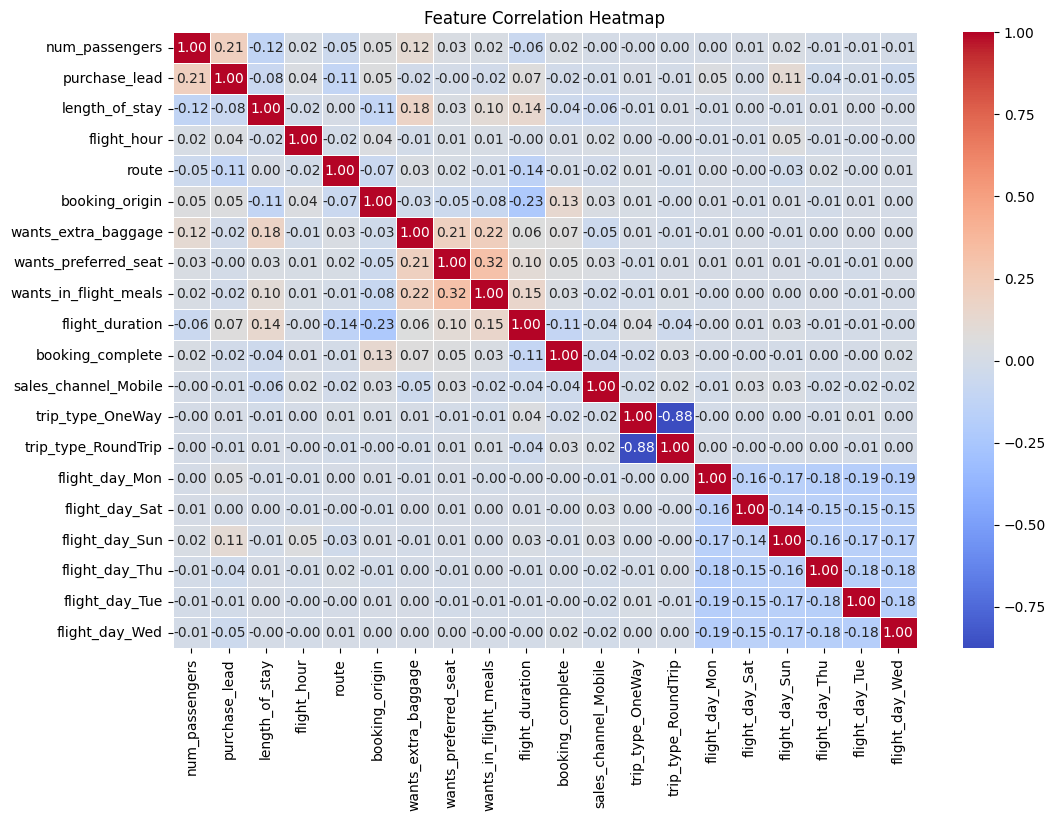

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Title
plt.title("Feature Correlation Heatmap")

# Show plot
plt.show()


In [25]:
import numpy as np

# Compute correlation matrix
corr_matrix = df.corr()

# Set a threshold for high correlation (e.g., 0.8)
threshold = 0.8

# Identify columns to drop
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]

# Drop highly correlated features
df_reduced = df.drop(columns=to_drop)

# Output the remaining features
df_reduced.head()


,num_passengers,purchase_lead,length_of_stay,flight_hour,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed
0,2,262,19,7,0,61,1,0,0,5.52,0,False,False,True,False,True,False,False,False,False
1,1,112,20,3,0,61,0,0,0,5.52,0,False,False,True,False,True,False,False,False,False
2,2,243,22,17,0,36,1,1,0,5.52,0,False,False,True,False,False,False,False,False,True
3,1,96,31,4,0,61,0,0,1,5.52,0,False,False,True,False,True,False,False,False,False
4,2,68,22,15,0,36,1,0,1,5.52,0,False,False,True,False,False,False,False,False,True


<h2> Model Building And Training

In [26]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop(columns=['booking_complete'])  # Features
y = df['booking_complete']  # Target variable

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the resulting datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((40000, 19), (10000, 19), (40000,), (10000,))

Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(accuracy)
print(precision)
print(recall)
print(f1)


0.8504
0.0
0.0
0.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [29]:
# Checking the class distribution of the target variable
class_distribution = df["booking_complete"].value_counts(normalize=True) * 100
class_distribution


,proportion
booking_complete,
0,85.044
1,14.956


<h2>SMOTE (Synthetic Minority Over-sampling Technique)

In [30]:
!pip install imbalanced-learn

In [31]:
from imblearn.over_sampling import SMOTE

# Define features and target variable
X = df.drop(columns=["booking_complete"])  # Features
y = df["booking_complete"]  # Target

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution after applying SMOTE
y_resampled.value_counts()


,count
booking_complete,
0,42522
1,42522


In [32]:
# Rebalancing the dataset again using SMOTE (if necessary)
from imblearn.over_sampling import SMOTE

# Define features (X) and target variable (y)
X = df.drop(columns=["booking_complete"])
y = df["booking_complete"]

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert back to DataFrame
df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced["booking_complete"] = y_resampled

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Checking the shape of the resulting sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((68035, 19), (17009, 19), (68035,), (17009,))

Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

accuracy, precision, recall, f1


(0.9019342700923041,
 0.9197985752886269,
 0.8806444026340545,
 0.8997957467259402)

<h2>Feature Importance

In [34]:
# Get feature importance from the trained Random Forest model
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
feature_importance_df.head(10)


,Feature,Importance
5,booking_origin,0.159622
1,purchase_lead,0.124228
4,route,0.120402
2,length_of_stay,0.097669
9,flight_duration,0.097491
3,flight_hour,0.086695
15,flight_day_Sun,0.039300
13,flight_day_Mon,0.037492
17,flight_day_Tue,0.036946
16,flight_day_Thu,0.036806


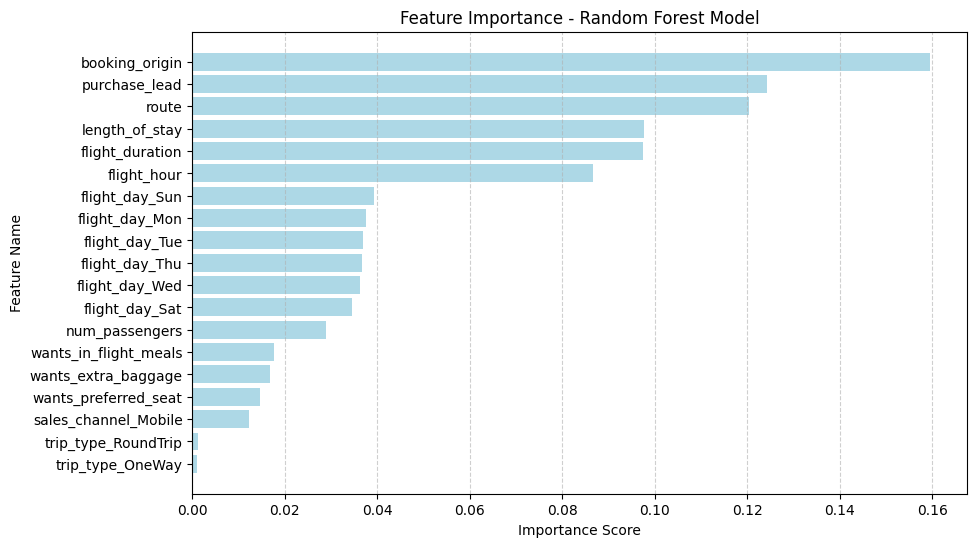

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming 'rf_model' is the trained Random Forest model
# and 'X_train' is the dataset used for training
feature_importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'],color='lightblue')
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.title("Feature Importance - Random Forest Model")
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()


In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Perform cross-validation (5-fold)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

# Get predictions on test set
y_pred = rf_model.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)

cv_scores.mean()
report


'              precision    recall  f1-score   support\n\n           0       0.89      0.92      0.90      8505\n           1       0.92      0.88      0.90      8504\n\n    accuracy                           0.90     17009\n   macro avg       0.90      0.90      0.90     17009\nweighted avg       0.90      0.90      0.90     17009\n'

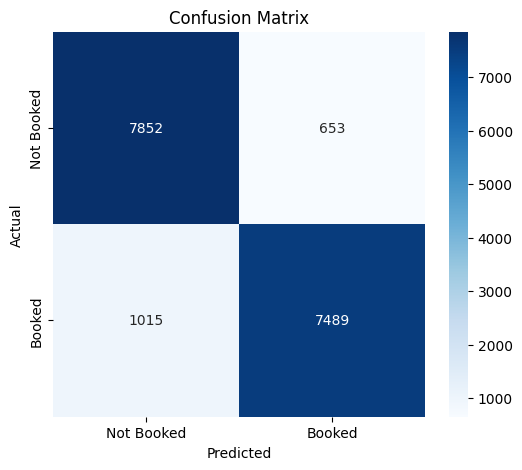

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Booked", "Booked"], yticklabels=["Not Booked", "Booked"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

([<matplotlib.axis.YTick at 0x7c7a7fad3150>,
 [Text(0, 0.5, 'Not Booked'), Text(0, 1.5, 'Booked')])

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


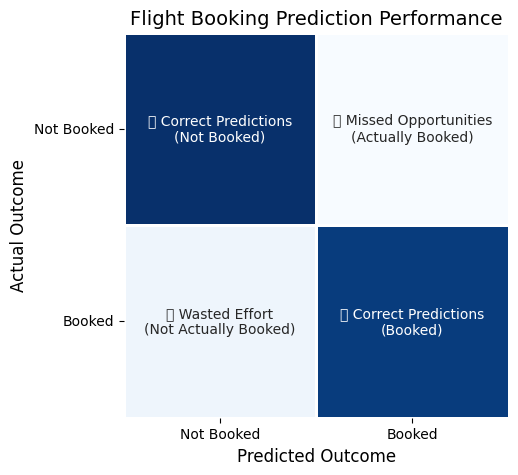

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Confusion matrix values
conf_matrix = np.array([[7852, 653], [1015, 7489]])

# Labels for better readability
labels = np.array([["✅ Correct Predictions\n(Not Booked)", "❌ Missed Opportunities\n(Actually Booked)"],
                   ["❌ Wasted Effort\n(Not Actually Booked)", "✅ Correct Predictions\n(Booked)"]])

# Creating a heatmap
plt.figure(figsize=(6, 5))
ax = sns.heatmap(conf_matrix, annot=labels, fmt="", cmap="Blues", linewidths=1, square=True, cbar=False)

# Labels and Title
plt.xlabel("Predicted Outcome", fontsize=12)
plt.ylabel("Actual Outcome", fontsize=12)
plt.title("Flight Booking Prediction Performance", fontsize=14)
plt.xticks(ticks=[0.5, 1.5], labels=["Not Booked", "Booked"])
plt.yticks(ticks=[0.5, 1.5], labels=["Not Booked", "Booked"], rotation=0)
